# __a)__

In [51]:
!pip install tensorflow
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf
from lime import lime_image
import skimage
from skimage import io
from skimage.segmentation import mark_boundaries

In [53]:
model = MobileNetV2(weights = 'imagenet')

In [54]:
def transform_img_fn_ori(url):
    
    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (224,224))
    img = (img - 0.5)*2
    img = np.expand_dims(img, axis=0)
    preds = model.predict(img)

    for name, desc, score in decode_predictions(preds, top=5)[0]:
      print('- {}({:.2f}%)'.format(desc, 100*score))
    return img

# __b)__

## `snail`

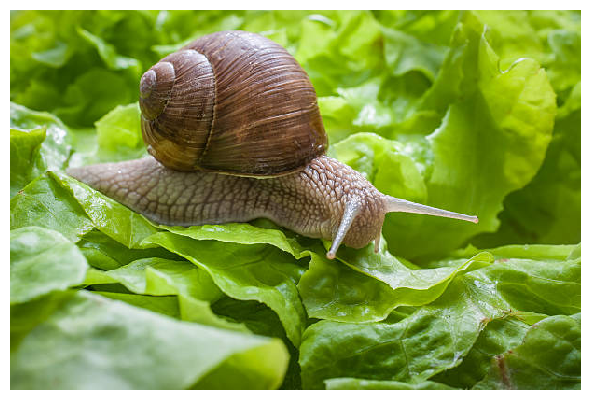

In [55]:
url = 'snail.jpg'
io.imshow(url)
plt.axis('off');

In [56]:
images_inc_im = transform_img_fn_ori(url)

1/1 [==============================] - 1s 1s/step
- snail(94.56%)
- slug(0.17%)
- isopod(0.14%)
- hermit_crab(0.10%)
- conch(0.08%)


# __c)__

In [57]:
explainer = lime_image.LimeImageExplainer()

# __d, e)__

In [58]:
explanation= explainer.explain_instance(images_inc_im[0].astype('double'), model.predict, hide_color=0, top_labels=5, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 586ms/step


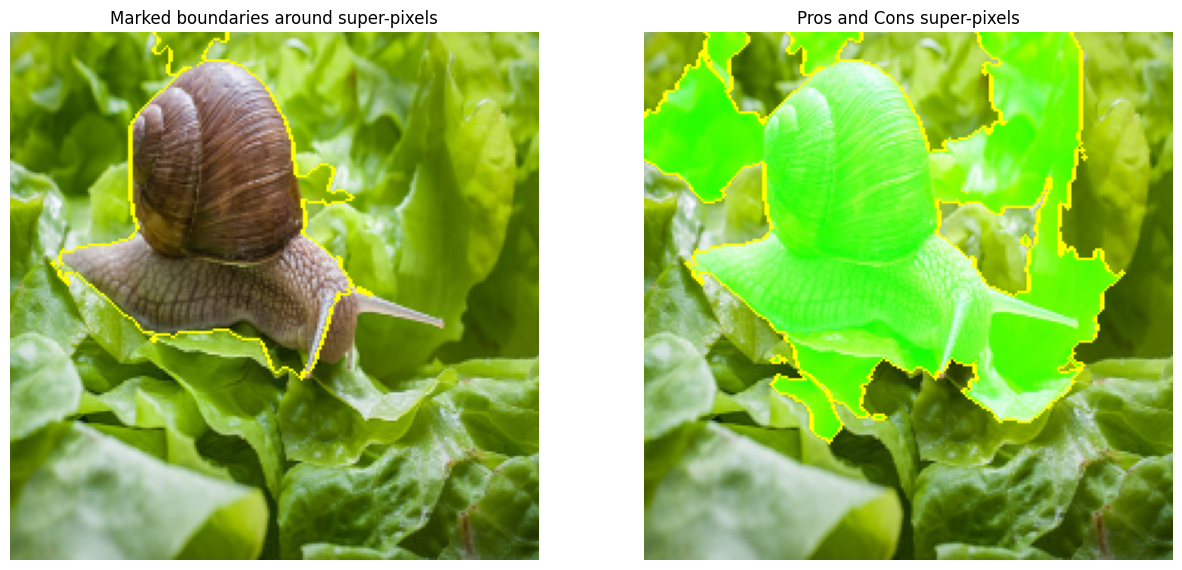

In [59]:
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1/2 + 0.5, mask_1))
ax1.set_title('Marked boundaries around super-pixels')
ax2.imshow(mark_boundaries(temp_2/2 + 0.5, mask_2))
ax2.set_title('Pros and Cons super-pixels')
ax1.axis('off')
ax2.axis('off');

# __f)__

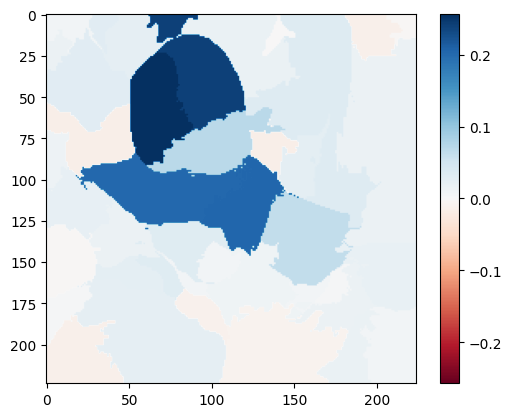

In [60]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# __g)__

## `red wine` & `wine bottle` & `pizza`

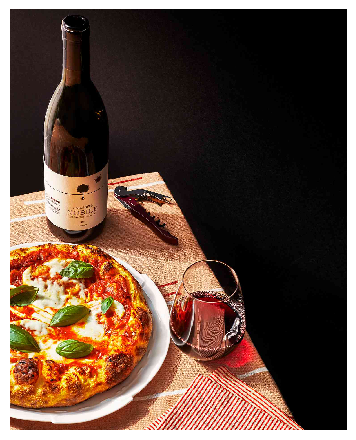

In [61]:
url = 'redwine_and_pizza.jpg'
io.imshow(url)
plt.axis('off');

In [62]:
images_inc_im = transform_img_fn_ori(url)

1/1 [==============================] - 0s 68ms/step
- pizza(35.83%)
- red_wine(14.68%)
- wine_bottle(4.82%)
- frying_pan(3.78%)
- potpie(2.34%)


In [63]:
explainer = lime_image.LimeImageExplainer()
explanation= explainer.explain_instance(images_inc_im[0].astype('double'), model.predict, hide_color=0, top_labels=5, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 366ms/step


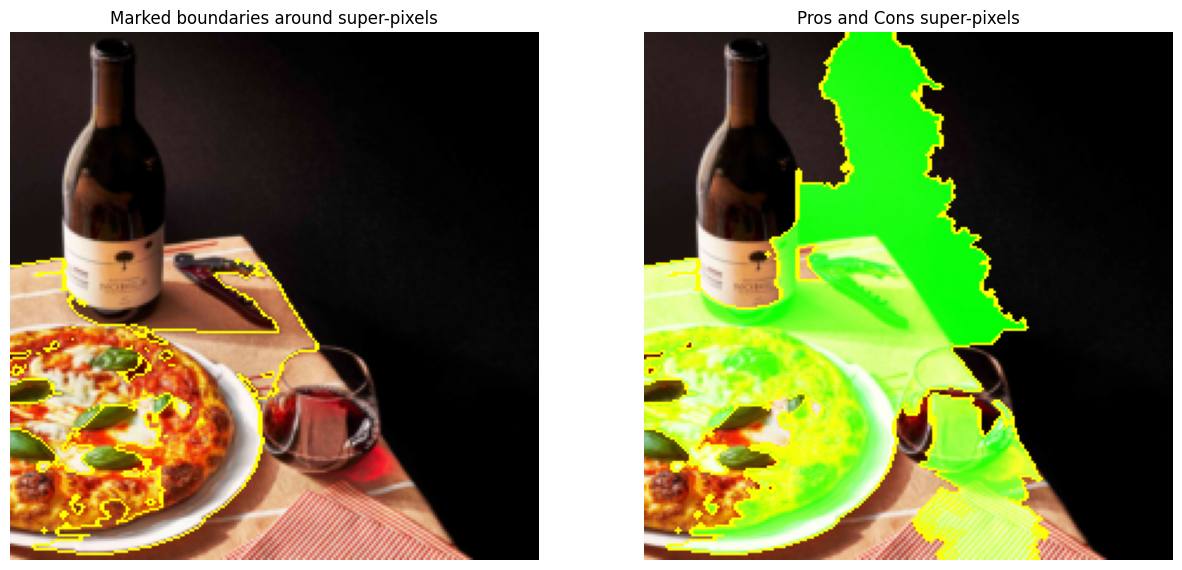

In [64]:
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1/2 + 0.5, mask_1))
ax1.set_title('Marked boundaries around super-pixels')
ax2.imshow(mark_boundaries(temp_2/2 + 0.5, mask_2))
ax2.set_title('Pros and Cons super-pixels')
ax1.axis('off')
ax2.axis('off');

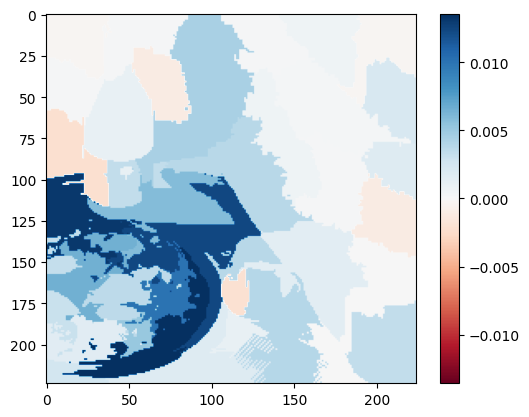

In [65]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

## `Trailer truck` & `Traffic light`

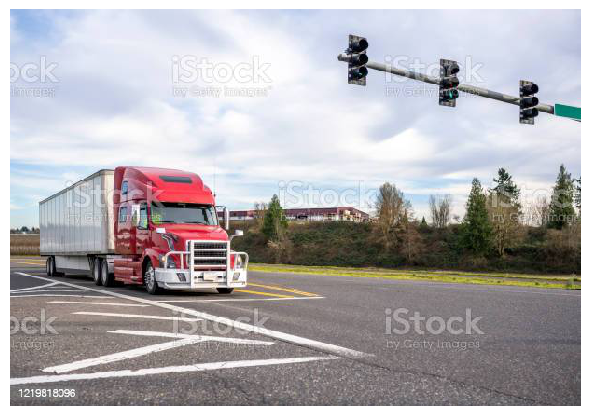

In [66]:
url = 'trafficlights_trailertruck.jpg'
io.imshow(url)
plt.axis('off');

In [67]:
images_inc_im = transform_img_fn_ori(url)

1/1 [==============================] - 0s 64ms/step
- trailer_truck(72.14%)
- fire_engine(10.30%)
- traffic_light(2.05%)
- harvester(1.05%)
- tow_truck(0.94%)


In [68]:
explainer = lime_image.LimeImageExplainer()
explanation= explainer.explain_instance(images_inc_im[0].astype('double'), model.predict, hide_color=0, top_labels=5, num_samples=800)

  0%|          | 0/800 [00:00<?, ?it/s]

1/1 [==============================] - 0s 328ms/step


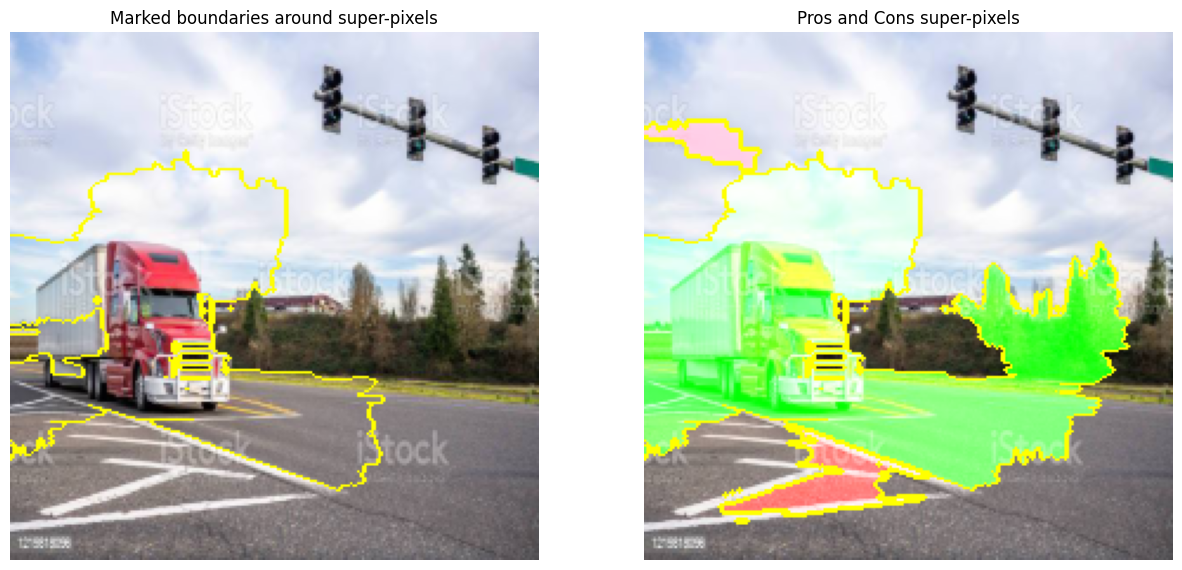

In [69]:
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1/2 + 0.5, mask_1))
ax1.set_title('Marked boundaries around super-pixels')
ax2.imshow(mark_boundaries(temp_2/2 + 0.5, mask_2))
ax2.set_title('Pros and Cons super-pixels')
ax1.axis('off')
ax2.axis('off');

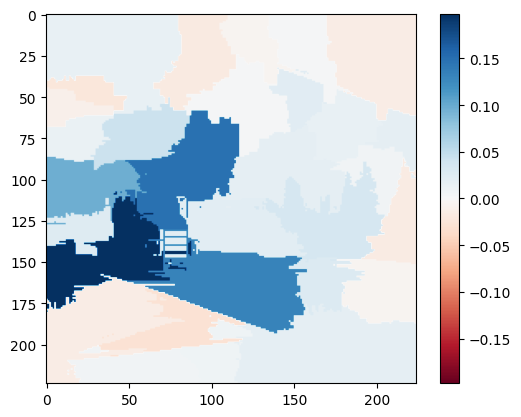

In [70]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

## `Teddy Bear`

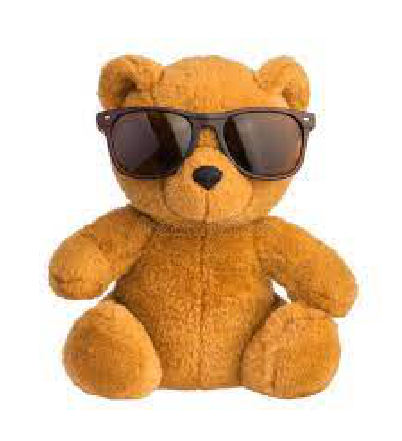

In [72]:
url = 'teddy_bear.jpg'
io.imshow(url)
plt.axis('off');

In [73]:
images_inc_im = transform_img_fn_ori(url)

1/1 [==============================] - 0s 108ms/step
- teddy(83.26%)
- sunglass(3.69%)
- sunglasses(1.28%)
- tennis_ball(0.38%)
- Band_Aid(0.24%)


In [74]:
explainer = lime_image.LimeImageExplainer()
explanation= explainer.explain_instance(images_inc_im[0].astype('double'), model.predict, hide_color=0, top_labels=5, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 371ms/step


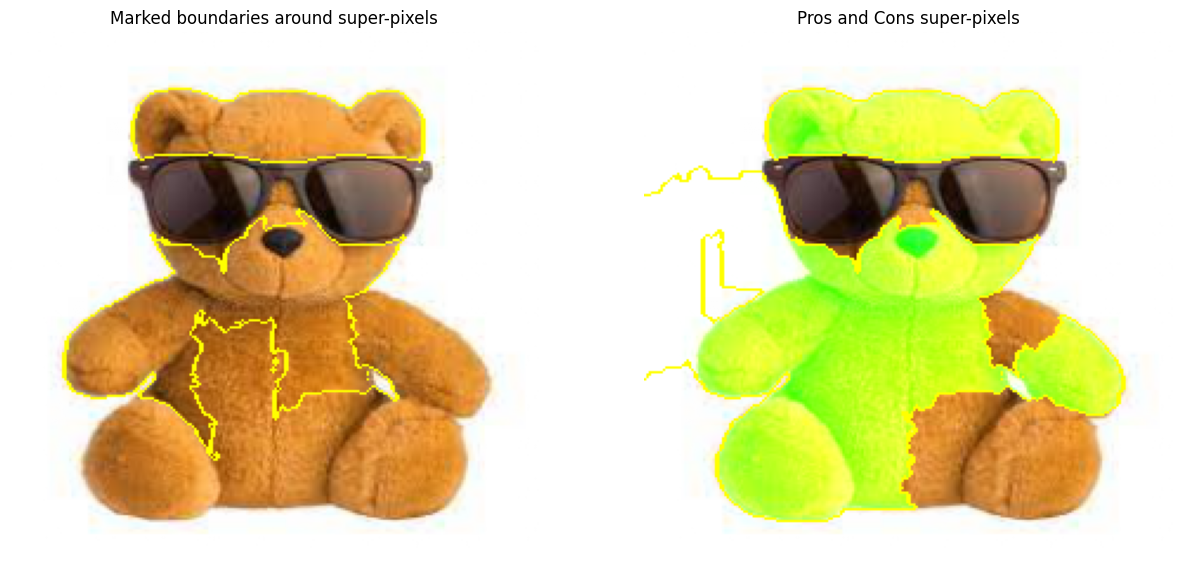

In [75]:
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1/2 + 0.5, mask_1))
ax1.set_title('Marked boundaries around super-pixels')
ax2.imshow(mark_boundaries(temp_2/2 + 0.5, mask_2))
ax2.set_title('Pros and Cons super-pixels')
ax1.axis('off')
ax2.axis('off');

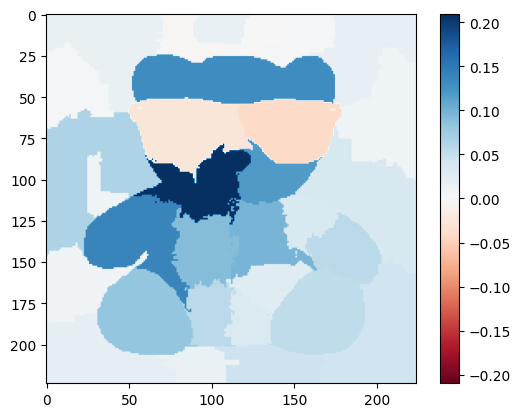

In [76]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar();